In [8]:
from neural_network import ChessNN
import numpy as np
from PIL import ImageFont
import pprint
import tensorflow as tf
import visualkeras

In [2]:
nn = ChessNN()
model = nn.build_model()

2025-12-07 14:05:02.681569: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-12-07 14:05:02.681601: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-12-07 14:05:02.681612: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-12-07 14:05:02.681679: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-12-07 14:05:02.682098: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
model.summary()

Model: "chess_nn"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 board_input (InputLayer)    [(None, 8, 8, 18)]           0         []                            
                                                                                                  
 initial_conv (Conv2D)       (None, 8, 8, 128)            20736     ['board_input[0][0]']         
                                                                                                  
 initial_bn (BatchNormaliza  (None, 8, 8, 128)            512       ['initial_conv[0][0]']        
 tion)                                                                                            
                                                                                                  
 initial_relu (ReLU)         (None, 8, 8, 128)            0         ['initial_bn[0][0]']   

### Set up toy model

In [5]:
x0 = tf.keras.Input(shape=(8, 8, 18), name='board_input')
x1 = tf.keras.layers.Conv2D(
    filters=128,
    kernel_size=3,
    padding='same',
    use_bias=False,
    name='initial_conv'
)(x0)
x2 = tf.keras.layers.BatchNormalization(name='x1_batch_normalization')(x1)
x3 = tf.keras.layers.ReLU(name='x2_relu')(x2)
toy_model = tf.keras.Model(inputs=x0, outputs=x3, name='toy_model')

In [6]:
toy_model.summary()

Model: "toy_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 board_input (InputLayer)    [(None, 8, 8, 18)]        0         
                                                                 
 initial_conv (Conv2D)       (None, 8, 8, 128)         20736     
                                                                 
 x1_batch_normalization (Ba  (None, 8, 8, 128)         512       
 tchNormalization)                                               
                                                                 
 x2_relu (ReLU)              (None, 8, 8, 128)         0         
                                                                 
Total params: 21248 (83.00 KB)
Trainable params: 20992 (82.00 KB)
Non-trainable params: 256 (1.00 KB)
_________________________________________________________________


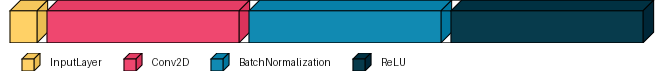

In [11]:
# 2D layered view
visualkeras.layered_view(toy_model, to_file="toy_model_2d.png", legend=True)

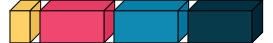

In [14]:
# 3D perspective view (great for conv layers)
visualkeras.layered_view(toy_model, to_file="toy_model_3d.png", scale_z=0.5, max_xy=300)

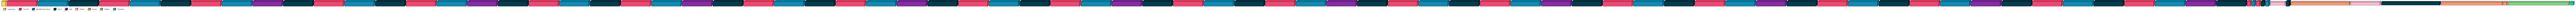

In [13]:
visualkeras.layered_view(model, to_file="model_2d.png", legend=True)

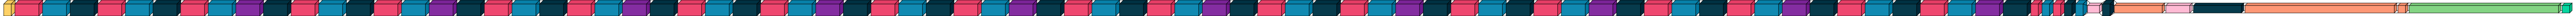

In [15]:
visualkeras.layered_view(model, to_file="model_3d.png", scale_z=0.5, max_xy=300)